## Logistic Regression / ROC Curves

### Caution: I am still debuggins one of the calculations! Please pull update tomorrow!

Chris Overton  
2016.09.29

## Goals
* Understand how and when to use logistic regression (e.g. instead of linear regression)
* Solid understanding definitions and and good intuition related to ROC curves:
    - Type I, Type II errors
    - {True, False} * {Positive, Negative}
    - Accuracy
    - Sensitivity, Specificity
    - Precision, Recall
    - How relative costs of errors can be used with a ROC curve to choose prediction: model and threshold

# Recap: Bias - Variance tradeoff

(Caution: watch out for mean questions!)

Suppose you are trying to model a variable y that (really) is generated from a single inputs feature x through the following process, with random error $\epsilon$:  
$$y = f(x) + \epsilon$$

1) For this to be a good description, how should $\epsilon$ behave?


2) Assuming $\epsilon$ has variance $\sigma^2$, what are some steps you can take to make your model have MSE less than $\sigma^2$?

3) If $f(x) = x^2$, and your model is linear ($\hat{f}(x) = \beta_0 + \beta_1 * x$), how do bias and variance appear (e.g. graphically)?

4) What happens to bias and variance as you model $\hat{f}$ as a polynomial of higher degree n?

5) In this case, where does model variance become particularly scary?

# Recap: Train/validation/test

Suppose you hve build zillions of models on a training set and have been selecting models based on their error on a validation set.

What is a possible bias if you estimate out-of-sample error as the error of the best model on the validation set?

<img src = 'images/biasVariance.png'></img>

# Recap: Regularization ("shrinkage")

* What are the relative merits of Ridge ($L_2$ penalty) and Lasso ($L_1$ penalty)?
* How do you adjust penalties so that you re doing 80% variable reduction and 20% reducing contribution of squared predictors?

<img src = 'images/shrinkage.png'></img>

# Limits of linear regression: Income vs Car

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [73]:
data = np.array([
 [11, 0],
 [14,0],
 [17, 0],
 [19, 0],
 [15, 0],
 [21, 0],
 [22, 0],
 [32, 0],
 [83, 0],
 [147, 1],
 [120, 1],
 [107, 1],
 [52, 1],
 [99,1]
])
df = pd.DataFrame(data, columns=['Income', 'Car'])

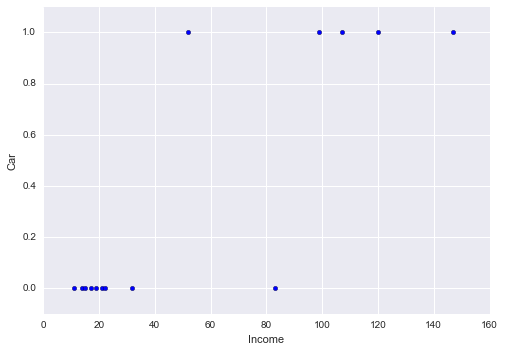

In [76]:
fig, ax = plt.subplots(1, 1) 
plt.scatter(df.Income, df.Car)
ax.set_xlabel('Income')
ax.set_ylabel('Car')
plt.ylim((-.1,1.1))
plt.show()

In [78]:
model = sm.OLS(df.Car, df.Income).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Car   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     48.20
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           1.02e-05
Time:                        13:07:03   Log-Likelihood:                -1.8135
No. Observations:                  14   AIC:                             5.627
Df Residuals:                      13   BIC:                             6.266
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Income         0.0075      0.001      6.943      0.000         0.005     0.010
==============================================================================
Omnibus:                        3.770   Durbin-Watson:                   0.726
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                1.291
Skew:                           0.482   Prob(JB):                        0.524
Kurtosis:                       4.133   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

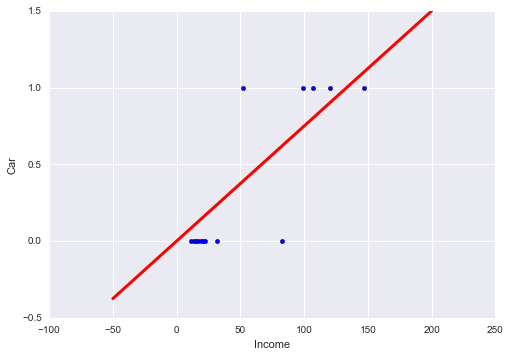

In [79]:
### What are the problems with this regression model?

x_lin = np.linspace(-50, 200)
y_lin = model.predict(x_lin)

fig, ax = plt.subplots(1, 1) 
plt.scatter(df.Income, df.Car)
ax.set_xlabel('Income')
ax.set_ylabel('Car')
plt.ylim((-.5,1.5))
ax.plot(x_lin, y_lin, color = 'red', lw = 3)
plt.show()

## Logistic Regression

Linear regression in this case:

Pros:
- Nice least squares solution

Cons:
- Models a continuous variable
- Produces unbounded results - we just want a probability from 0 to 1.

To use 'linear' tools to model a discrete probability, we transform the problem, using a link function

## Logit link

<img src='images/logitLink.png'></img>

## Logit link
This s-shaped curve was created using the logistic function which comes from the sigmoid family:

$$s(t) = \frac{1}{1 + e^{-t}}$$

This is going to be our “link” function.  

This is going to be one of several link functions used in *General Linear Models* (GLM.)

Today, we will only study Logistic regression.

## The basic transform of Logistic Regression

Instead of modeling p(x) (probability), we model logarithm of 'odds':
$$\frac{p}{1-p}$$

What we actually obtain indirectly is:

$$ p(y) = \frac{1}{e^{-(\beta_0 + X_{features} \cdot \beta)}}$$

But we do this by doing (roughly) linear modeling on:

$$ ln(\frac{p(y)}{1-p(y)}) = \beta_0 + X_{features} \cdot \beta $$

# Logistic Regression with Statsmodels

Compared to the main alternative (scikit learn), statsmodels offer more built-in diagnostics.  

For logistic regression, several of these are based on likelihoods rather than on direct mean squared errors.

'Pseudo $R^2$' is one metric useful to compare fits of different logistic models on a data set.

In [105]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import tools

In [115]:
#statsmodels variable order: y, then x
x_train = tools.add_constant(df.Income)
model2 = Logit(df.Car,x_train).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.230090
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Car   No. Observations:                   14
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Sep 2016   Pseudo R-squ.:                  0.6470
Time:                        13:39:04   Log-Likelihood:                -3.2213
converged:                       True   LL-Null:                       -9.1246
                                        LLR p-value:                 0.0005902
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -4.5932      2.225     -2.064      0.039        -8.954    -0.232
Income         0.0661      0.031      2.124      0.034         0.005     0.127
==============================================================================
"""

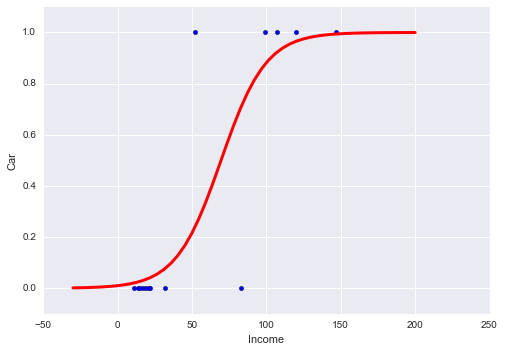

In [135]:
x_sm_test = tools.add_constant(np.linspace(-30, 200))
y_sm = model2.predict(x_sm_test)

fig, ax = plt.subplots(1, 1) 
plt.scatter(df.Income, df.Car)
ax.set_xlabel('Income')
ax.set_ylabel('Car')
plt.ylim((-.1,1.1))


ax.plot(x_sm_test[:,1], y_sm, color = 'red', lw = 3)

plt.show()

# Logistic Regression with Sklearn

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import roc_auc_score

In [85]:
model3 = LogisticRegression()
model3.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [126]:
# Notice that argument order is features "x" first, then y -- unlike statsmodel!)

model3.fit(pd.DataFrame(df.Income),df.Car)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Each kind of estimator has its own 'score' implementation. In the Case of LogisticRegression, this calculates the fraction of sample points correctly classified - in this case 12 / 14.

In [128]:
model3.score(pd.DataFrame(df.Income),df.Car)

0.8571428571428571

The coefficient list below does not include the intercept ($\beta_0$), which must be pulled separately:

In [129]:
model3.coef_

array([[ 0.02846398]])

In [130]:
model3.intercept_

array([-1.59639797])

In [145]:
test = np.arange(40,80,10)
model3.predict(pd.DataFrame(test))

array([0, 0, 1, 1])

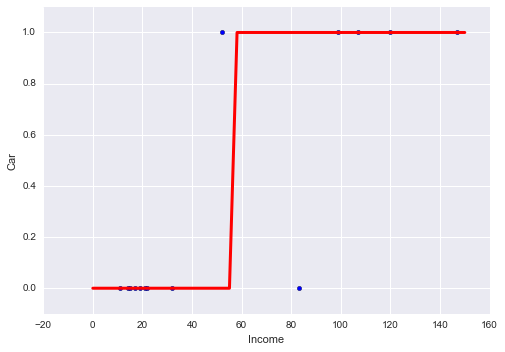

In [134]:
#YIKES! The following decision boundary seems way too sharp!

#What happens here is that unlike statsmodels, the 'predict' function chooses its own threshold (0.5),
#and shows the classification, which is either 0 or 1. (See next slide for the probability function.)

x_log_sk = np.linspace(-0, 150)
y_log_sk = model3.predict(pd.DataFrame(x_log_sk))

fig, ax = plt.subplots(1, 1) 
plt.scatter(df.Income, df.Car)
ax.set_xlabel('Income')
ax.set_ylabel('Car')
plt.ylim((-.1,1.1))
ax.plot(x_log_sk, y_log_sk, color = 'red', lw = 3)
plt.show()

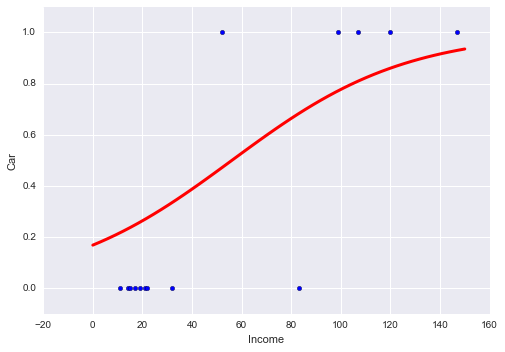

In [149]:
#This is how to show a graph like we saw for statsmodels:
#instead of 'predict', use 'predict_proba' (line 2)
#Choosing element 1 of this returns probabilities for the second category.

x_log_sk = np.linspace(-0, 150)
y_log_sk = model3.predict_proba(pd.DataFrame(x_log_sk))[:,1]

fig, ax = plt.subplots(1, 1) 
plt.scatter(df.Income, df.Car)
ax.set_xlabel('Income')
ax.set_ylabel('Car')
plt.ylim((-.1,1.1))
ax.plot(x_log_sk, y_log_sk, color = 'red', lw = 3)
plt.show()

In [132]:
predicted_Car = model3.predict(pd.DataFrame(df.Income))

In [133]:
roc_auc_score(predicted_Car, df.Car)

0.84444444444444433

# ROC Curves

It turns out we could actually derive infinitely many predictors from our logistic model!

<img src='images/assessingModelFit.png'></img>

## ROC curves

<img src='images/roc.png'></img>

## Confusion matrices

<img src='images/confusion.png'></img>

## Confusion matrices

Review of different measures of (in)accuracy:
- Accuracy
- 'Positive'/'Negative' refer to predictions
- True/False compare predictions to reality
- Recall the kinds of errors: Type I, Type II
- Traditional accuracy metrics: Sensitivity, Specificity

- New terminology: Precision/Recall

Roc graphs sensitivity (recall) by 1-specificity.

## Building a ROC curve from raw data points

<img src='images/rocStart.png'></img>